In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base() 

# reflect the tables
Base.prepare(engine, reflect=True) 


In [6]:
# View all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

#get types
measurement_columns = inspector.get_columns('measurement')
print('measurement')
for c in measurement_columns:
    print(c['name'], c['type'])

print()
station_columns = inspector.get_columns('station')
print('station')
for c in station_columns:
    print(c['name'], c['type'])

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine) 

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
result = engine.execute("select max(date) from measurement").fetchall()
latest_date = result[0][0]
latest_date

'2017-08-23'

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
last_year_data = engine.execute('select * from measurement where date > "2016-08-23"').fetchall()
last_year_data

[(2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0),
 (2375, 'USC00519397', '2016-09-03', 0.0, 79.0),
 (2376, 'USC00519397', '2016-09-04', 0.03, 75.0),
 (2377, 'USC00519397', '2016-09-05', None, 79.0),
 (2378, 'USC00519397', '2016-09-06', None, 76.0),
 (2379, 'USC00519397', '2016-09-07', 0.05, 76.0),
 (2380, 'USC00519397', '2016-09-08', 0.0, 80.0),
 (2381, 'USC00519397', '2016-09-09', 0.03, 79.0),
 (2382, 'USC00519397', '2016-09-10', 0.0, 78.0),
 (2383, 'USC00519397', '2016-09-11', 0.05, 76.0),
 (2384, 'USC00519397', '2016-09-12', 0.0, 78.0),
 (2385, 'U

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_year_data, columns= ['id', 'station', 'date', 'prcp', 'tobs'])
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True,)

# Sort the dataframe by date
df.sort_values(by=['date'])

,id,station,prcp,tobs
date,,,,
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-24,8826,USC00517948,NaN,78.0
2016-08-24,14609,USC00519281,2.15,77.0
2016-08-24,7332,USC00514830,2.28,80.0
2016-08-24,5092,USC00513117,2.15,76.0
...,...,...,...,...
2017-08-22,12186,USC00519523,0.00,82.0
2017-08-23,12187,USC00519523,0.08,82.0
2017-08-23,2724,USC00519397,0.00,81.0


In [13]:
df['2016-09-24']

,id,station,prcp,tobs
date,,,,
2016-09-24,2396,USC00519397,0.00,81.0
2016-09-24,5123,USC00513117,0.00,79.0
2016-09-24,7356,USC00514830,0.00,82.0
2016-09-24,11882,USC00519523,0.00,83.0
2016-09-24,14640,USC00519281,0.01,79.0
2016-09-24,19233,USC00516128,0.27,77.0


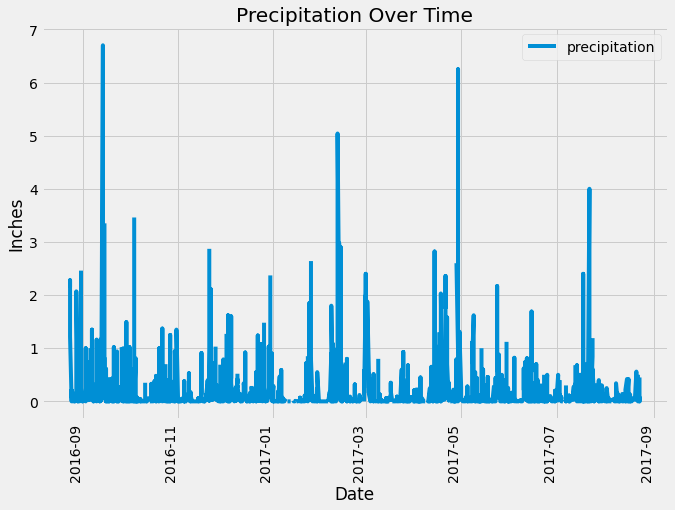

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
#Plot gallons of alcohol over time for all states
df.plot( y='prcp', title="Precipitation Over Time", rot=90, figsize=(10,8))
plt.ylabel('Inches')
plt.xlabel('Date')
plt.legend(['precipitation'])

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df["prcp"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
#count unique
station_count = session.query(station.id).count()
station_count

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, (func.count(measurement.station))).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc())

#fetch
active_stations.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

#fetch
most_active_station

[(54.0, 85.0, 71.66378066378067)]

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
USC00519281_data = session.query(measurement.date, measurement.tobs).\
                    filter(measurement.station == 'USC00519281').\
                    filter(measurement.date > '2016-08-18').all()

#fetch
USC00519281_data
                 

[('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-

Text(0.5, 0, 'Temperature')

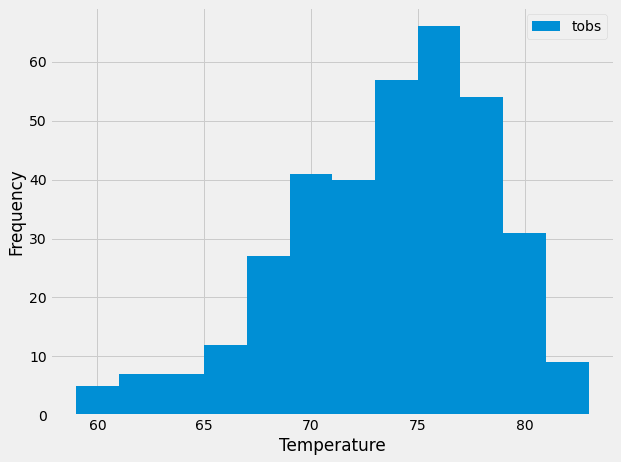

In [20]:
#plot the results as a histogram
USC00519281_data_df = pd.DataFrame(USC00519281_data)
USC00519281_data_df.plot(kind="hist", y='tobs', figsize=(9,7), bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')


# Close session

In [21]:
# Close Session
session.close()